# IMPORTING NECESSARY LIBARIRIES

In [156]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
df = pd.read_csv("Online Retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


# EXPLORATORY DATA ANALYSIS

# Removing Negative Quantity (Returned Products)

In [160]:
# Separate negative Quantity 
df = df[(df["Quantity"] > 0)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


# Removing Negative Price

In [162]:
#Separate Negative Price
df = df[df["UnitPrice"] > 0 ]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


# Filtering Invalid Stockcodes 

In [164]:
invalid_stockcodes = ["POST", "DOT", "BANK CHARGES", "AMAZONFEE", "B","M",
                      "gift_0001_10", "gift_0001_20", "gift_0001_30", 
                      "gift_0001_40", "gift_0001_50"]

# Remove rows where StockCode is in the invalid list
df = df[~df["StockCode"].isin(invalid_stockcodes)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


# Renaming The Description Column

In [166]:
#Renaming the Description to Products
df = df.rename(columns={"Description": "Product"})
df.head()


,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527905 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    527905 non-null  object 
 1   StockCode    527905 non-null  object 
 2   Product      527905 non-null  object 
 3   Quantity     527905 non-null  int64  
 4   InvoiceDate  527905 non-null  object 
 5   UnitPrice    527905 non-null  float64
 6   CustomerID   396473 non-null  float64
 7   Country      527905 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.2+ MB


# Checking For Missing Values

In [169]:
#Checking for Missing Values
df.isna().sum()

InvoiceNo           0
StockCode           0
Product             0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     131432
Country             0
dtype: int64

# Checking And Dropping Duplicates

In [171]:
#Checking for duplictes
df.duplicated().sum()

5221

In [172]:
#Dropping Duplicates
df.drop_duplicates(inplace=True)


In [173]:
df["CustomerID"].value_counts()

CustomerID
17841.0    7667
14911.0    5668
14096.0    5095
12748.0    4397
14606.0    2674
           ... 
12346.0       1
13307.0       1
16990.0       1
15389.0       1
17763.0       1
Name: count, Length: 4334, dtype: int64

# Filling Missing Values

In [175]:
#Filling Missing values
df["CustomerID"].ffill(inplace = True)

# Convert CustomerID to integer
df["CustomerID"] = df["CustomerID"].astype(int)


# Checking for Unique Values In columns

In [177]:
# Check unique values in columns
for col in df.select_dtypes(include="object"):
    print(f"{col}: {df[col].nunique()} unique values")

InvoiceNo: 19778 unique values
StockCode: 3911 unique values
Product: 4016 unique values
InvoiceDate: 18336 unique values
Country: 38 unique values


In [178]:
# Check for Unique values in Country since it is not much
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

# Renaming The Country Column

In [180]:
#Replace 'Unspecified' with Unknown
df["Country"] = df["Country"].replace("Unspecified", "Unknown")

# FEATURE ENGINEERING

# Total Sales

In [183]:
#Sales Feature
df['TotalSales'] = df['Quantity'] * df['UnitPrice']


In [184]:
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M')
df.head()

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# Year

In [186]:
# Extract Year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year

# Group by Year and Sum Sales
yearly_trends = df.groupby('Year')['TotalSales'].sum().reset_index()
yearly_trends

,Year,TotalSales
0,2010,776240.910
1,2011,9478095.013


# Quarter

In [188]:
# Extract Quarter from InvoiceDate

df['Quarter'] = df['InvoiceDate'].dt.quarter

#Group By Quarter and Sum of Sales
quarter_trends = df.groupby("Quarter")["TotalSales"].sum().reset_index()
quarter_trends = quarter_trends.sort_values(by = "Quarter")
quarter_trends


,Quarter,TotalSales
0,1,1869178.620
1,2,1994305.971
2,3,2442606.222
3,4,3948245.110


# Month

In [190]:
# Extracting the  Month Name
df['Month'] = df['InvoiceDate'].dt.strftime('%B') #strftime(string Format Time), %B(Python Magic Code to format date to Month).

# Definining the correct month order
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Ensuring the Month is a categorical variable with the correct order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Group by Month and Sum Sales
monthly_trends = df.groupby('Month')['TotalSales'].sum().reset_index()
monthly_trends = monthly_trends.sort_values(by = "Month")
monthly_trends


,Month,TotalSales
0,January,670580.240
1,February,508014.870
2,March,690583.510
3,April,515807.991
4,May,740389.000
5,June,738108.980
6,July,688769.341
7,August,724616.500
8,September,1029220.381
9,October,1104047.300


# Hour Of The Day

In [192]:
#Extracting Hour 
df["Hour"] = df["InvoiceDate"].dt.hour

# Group by Hour and sum TotalSales
hourly_trends = df.groupby("Hour")["TotalSales"].sum().reset_index()

# Sort values by Hour
hourly_trends = hourly_trends.sort_values(by="Hour",ascending= False)
hourly_trends

,Hour,TotalSales
14,20,18831.030
13,19,49148.660
12,18,139179.120
11,17,441239.880
10,16,708966.480
9,15,1274084.200
8,14,1120494.121
7,13,1221330.180
6,12,1413994.370
5,11,1197587.550


# Period of The Day

In [194]:
# Define a function to categorize periods of the day
def get_period(hour):
    if hour < 12:
        return 'Morning'
    elif hour < 17:
        return 'Afternoon'
    elif hour < 20:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to extract periods
df['Period'] = df['InvoiceDate'].dt.hour.apply(get_period)


# Define the correct order of periods
period_order = ["Morning", "Afternoon", "Evening", "Night"]

# Ensure 'Period' is a categorical variable with the correct order
df['Period'] = pd.Categorical(df['Period'], categories=period_order, ordered=True)

# Calculate total sales per period
period_trends = df.groupby('Period')['TotalSales'].sum().reset_index()
period_trends = period_trends.sort_values(by='Period')
period_trends

,Period,TotalSales
0,Morning,3867067.882
1,Afternoon,5738869.351
2,Evening,629567.660
3,Night,18831.030


# Days Of The Week

In [196]:
#Extract the Days Of the Week
df['Days_of_Week'] = df['InvoiceDate'].dt.day_name()

# Define correct order of days
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert 'Days_of_Week' to categorical with correct order
df['Days_of_Week'] = pd.Categorical(df['Days_of_Week'], categories=days_order, ordered=True)

days_of_week_trends = df.groupby('Days_of_Week')['TotalSales'].sum().reset_index()
days_of_week_trends = days_of_week_trends.sort_values(by = "Days_of_Week")
days_of_week_trends

,Days_of_Week,TotalSales
0,Monday,1684105.520
1,Tuesday,2086192.871
2,Wednesday,1783531.390
3,Thursday,2133557.380
4,Friday,1768137.261
5,Saturday,0.000
6,Sunday,798811.501


# Grouping The Products By Sales

In [198]:
#Top Selling Products
top_selling = df.groupby('Product')[['Quantity','TotalSales']].sum()
top_selling = top_selling.sort_values(by='TotalSales',ascending = False)
top_selling.head(10)


,Quantity,TotalSales
Product,,
REGENCY CAKESTAND 3 TIER,13851,174156.54
"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
WHITE HANGING HEART T-LIGHT HOLDER,37872,106236.72
PARTY BUNTING,18283,99445.23
JUMBO BAG RED RETROSPOT,48371,94159.81
MEDIUM CERAMIC TOP STORAGE JAR,78033,81700.92
RABBIT NIGHT LIGHT,30739,66870.03
PAPER CHAIN KIT 50'S CHRISTMAS,19329,64875.59
ASSORTED COLOUR BIRD ORNAMENT,36362,58927.62


# Grouping The Country By Sales

In [200]:
#Top 10 Product By Country
top_selling_country = df.groupby('Country')[['Quantity','TotalSales']].sum()
top_selling_country = top_selling_country.sort_values(by='TotalSales',ascending = False)
top_selling_country.head(10)



,Quantity,TotalSales
Country,,
United Kingdom,4639147,8725984.273
Netherlands,200258,283889.340
EIRE,147002,276090.860
Germany,118032,205381.150
France,111229,184679.000
Australia,83890,138103.810
Spain,27724,55706.560
Switzerland,30515,53065.600
Japan,26016,37416.370


In [201]:
df.head(3)

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Quarter,Month,Hour,Period,Days_of_Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,December,8,Morning,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,December,8,Morning,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,December,8,Morning,Wednesday


# VISUALIZATIONS

# Top Selling Products

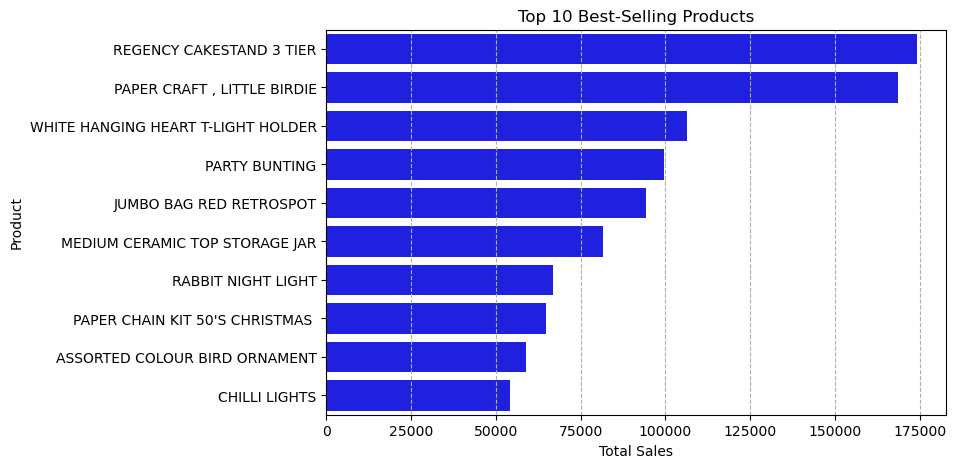

In [204]:
# Plot a horizontal bar chart
plt.figure(figsize=(8, 5))
sns.barplot(y="Product", x="TotalSales", data= top_selling.head(10), color="blue")

# Labels & Formatting
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.title("Top 10 Best-Selling Products")
plt.grid(axis="x", linestyle="--")

# Show the plot
plt.show()

# Top 10 Countries By Sales

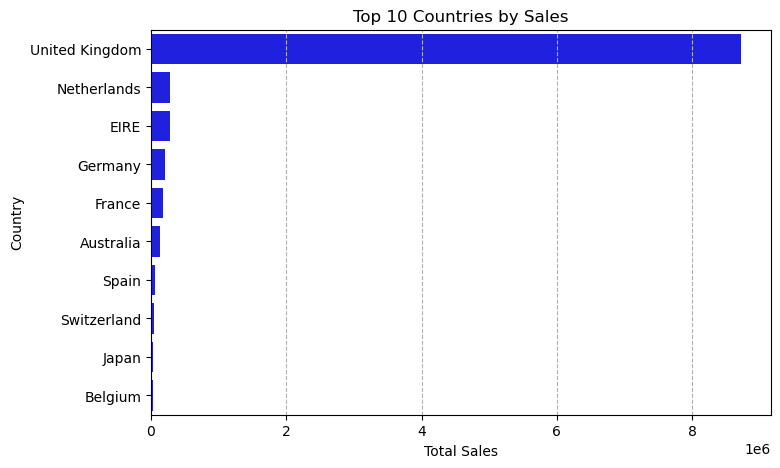

In [206]:
# Plot top 10 countries
plt.figure(figsize=(8, 5))
sns.barplot(y="Country", x="TotalSales",data=top_selling_country.head(10),  color="blue")

# Labels & Formatting
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.title("Top 10 Countries by Sales")
plt.grid(axis="x", linestyle="--")

# Show the plot
plt.show()

# PURCHASE TRENDS

# Monthly Purchase Trend

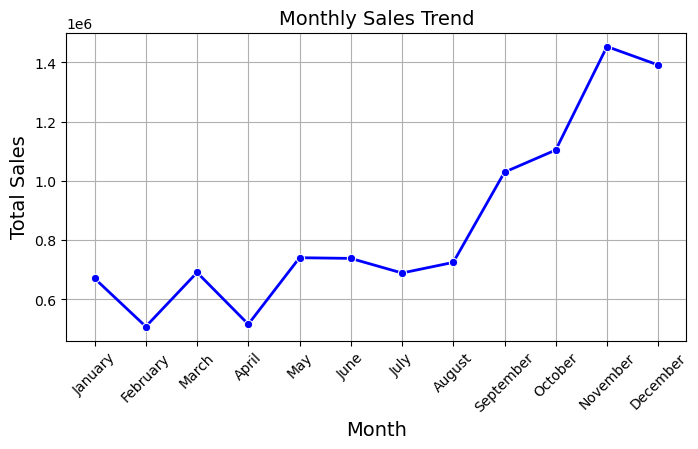

In [209]:
# Creating the plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=monthly_trends, x='Month', y='TotalSales', marker='o', linewidth=2, color='blue')

# Customize the chart
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)  # Add grid for better readability

# Show the plot
plt.show()

# Quarter Of the Year Trends

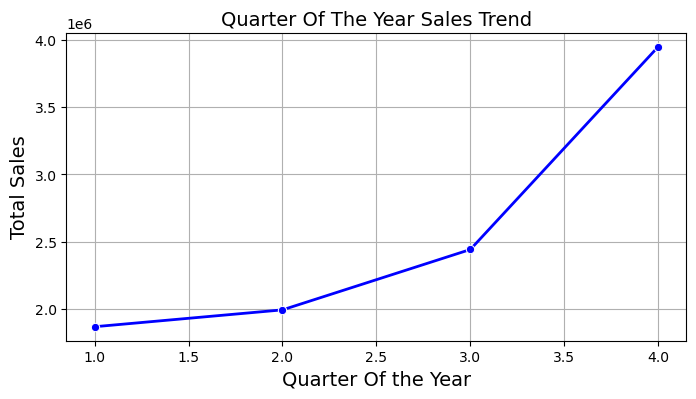

In [211]:
#Create the plot

plt.figure(figsize=(8, 4))

sns.lineplot(data=quarter_trends, x='Quarter', y='TotalSales', marker='o', linewidth=2, color='blue')

# Customize the chart
plt.title('Quarter Of The Year Sales Trend', fontsize=14)
plt.xlabel('Quarter Of the Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=360)  
plt.grid(True)  

# Show the plot
plt.show()

# Daily Purchase Trend

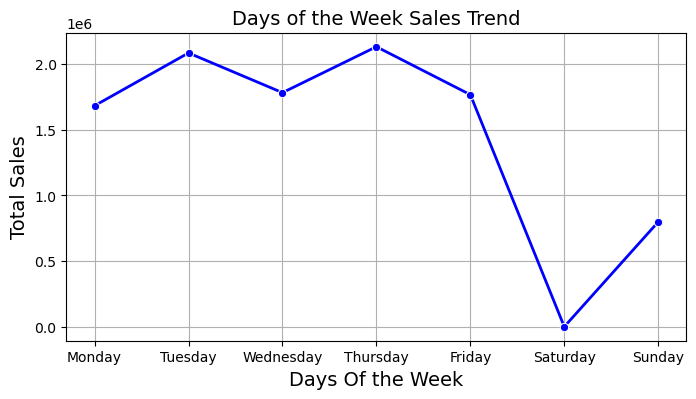

In [213]:
#Create the plot

plt.figure(figsize=(8, 4))

sns.lineplot(data=days_of_week_trends, x='Days_of_Week', y='TotalSales', marker='o', linewidth=2, color='blue')

# Customize the chart
plt.title('Days of the Week Sales Trend', fontsize=14)
plt.xlabel('Days Of the Week', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=360)  
plt.grid(True)  

# Show the plot
plt.show()

# Period Of The Day Purchase Trends

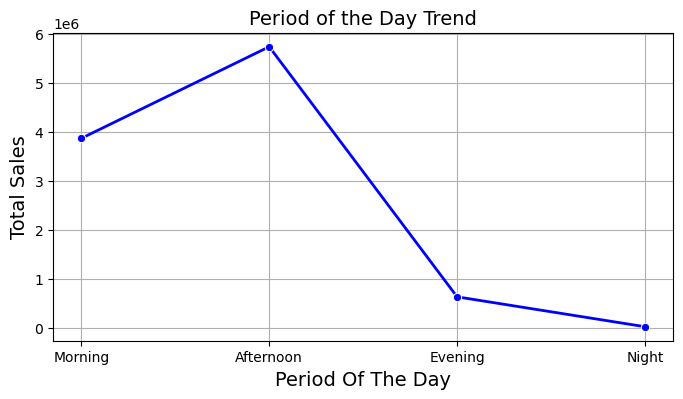

In [215]:
#Create the plot

plt.figure(figsize=(8, 4))

sns.lineplot(data=period_trends, x="Period",y="TotalSales",marker="o",linewidth=2, color= "blue")

# Customize the chart
plt.title('Period of the Day Trend', fontsize=14)
plt.xlabel('Period Of The Day', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=360)  
plt.grid(True)  

# Show the plot
plt.show()


# CUSTOMER SEGMENTATION 

#  Using The RFM Method To Check Customer Behaviour 

# Recency

In [219]:

#Setting the reference date to the end date of the analysis
reference_date = df["InvoiceDate"].max()

#Grouping data by customer and getting the latest purchase date for each customer
grouped = df.groupby("CustomerID")["InvoiceDate"].max().reset_index()


In [220]:
#Calculating the recency for each customer by subtracting the most recent purchase date from the reference date
grouped["Recency"] = (reference_date - grouped["InvoiceDate"]).dt.days

#Merging the recency value to the dataframe
df = df.merge(grouped[["CustomerID", "Recency"]], on = "CustomerID", how = "left")

# Frequency

In [222]:
#Calculating the frequency for each customer by counting the number of purchases
frequency = df.groupby("CustomerID")["InvoiceNo"].count()

#Merging the frequency value to the dataframe
df = df.merge(frequency, on = "CustomerID", how = "left")
df.rename(columns={"InvoiceNo_x" : "InvoiceNo", "InvoiceNo_y" : "Frequency"}, inplace = True)

## Monetary Value

In [224]:
# Step 1: Compute Monetary value per customer (sum of TotalSales)
monetary_value = df.groupby("CustomerID")["TotalSales"].sum().reset_index()

# Step 2: Merge the monetary value with the main dataframe
df = df.merge(monetary_value, on = "CustomerID", how = "left")

# Rename the column for clarity
df.rename(columns={"TotalSales_x" : "TotalSales", "TotalSales_y" : "MonetaryValue"}, inplace = True)

In [225]:
# Ensure unique customers before clustering
clustering_features = df.groupby("CustomerID").agg({
    "Recency": "min",          
    "Frequency": "max",        
    "MonetaryValue" : "max"
}).reset_index()

clustering_features.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346,325,1,77183.60
1,12347,1,182,4310.00
2,12348,74,201,2790.16
3,12349,18,72,1457.55
4,12350,309,16,294.40


# Selecting And Standardizing The Clustering Features

In [227]:
#Selecting the Relevant Features
features = ["Recency", "Frequency", "MonetaryValue"]
clustering_features = df[features]

# Standardizing the features
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features[["Recency", "Frequency", "MonetaryValue"]])



# Finding The Optimal Number Of Clusters

In [229]:
# Finding the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_features_scaled)
    inertia.append(kmeans.inertia_)


# Plotting the Elbow Curve To Get The Optimal K

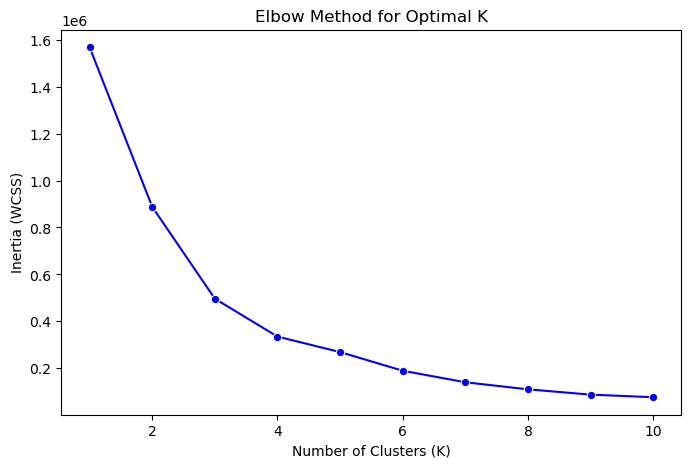

In [231]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
sns.lineplot(x=K_range, y=inertia, marker="o", color="b")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Applying K-Means Clustering

In [233]:
#Applying K-Means clustering with K=3 (since optimal K was 3)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(clustering_features_scaled)


# Assigning Labels To The Clustered Customers

In [235]:
# Firts We get the mean spending value for each cluster
cluster_means = df.groupby("Cluster")["MonetaryValue"].mean()

# Assigning the labels
cluster_mapping = {
    cluster_means.idxmax(): "High-Value Customers",
    cluster_means.idxmin(): "Occasional Shoppers"   
}

# Assign remaining cluster as "Frequent Buyers"
remaining_cluster = [c for c in cluster_means.index if c not in cluster_mapping]
if remaining_cluster:
    cluster_mapping[remaining_cluster[0]] = "Frequent Buyers"

# Map clusters to customer segments
df["Segment"] = df["Cluster"].map(cluster_mapping)


# Summary Statistics For Cluster Segment

In [237]:
# Summary statistics for each cluster
cluster_summary = df.groupby("Segment")[["Recency","Cluster","Frequency", "MonetaryValue"]].mean()
cluster_summary

,Recency,Cluster,Frequency,MonetaryValue
Segment,,,,
Frequent Buyers,22.858025,0.0,472.683951,6849.121472
High-Value Customers,1.815340,1.0,5043.688360,102206.177483
Occasional Shoppers,216.427277,2.0,202.961301,2305.241746


# Clustering Analysis Of Customers

In [239]:
# Display sample data
df[["CustomerID", "Recency", "Frequency", "MonetaryValue","Cluster", "Segment"]].head()

,CustomerID,Recency,Frequency,MonetaryValue,Cluster,Segment
0,17850,371,297,5391.21,2,Occasional Shoppers
1,17850,371,297,5391.21,2,Occasional Shoppers
2,17850,371,297,5391.21,2,Occasional Shoppers
3,17850,371,297,5391.21,2,Occasional Shoppers
4,17850,371,297,5391.21,2,Occasional Shoppers


# Visualize

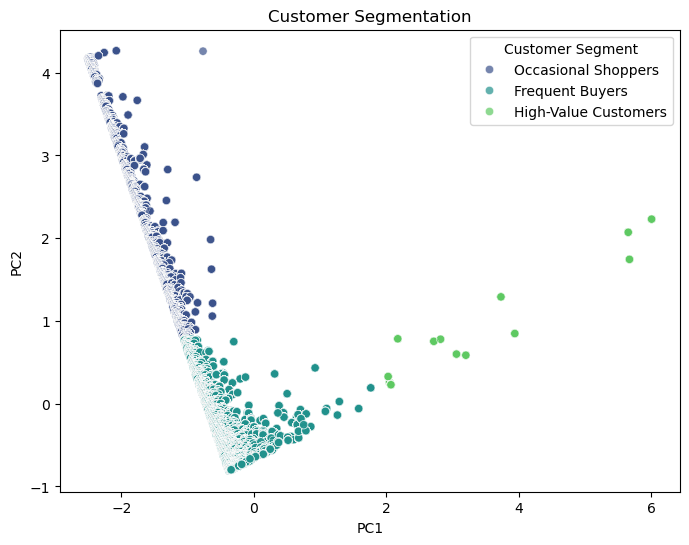

In [241]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_components = pca.fit_transform(clustering_features_scaled)

# Create a DataFrame with the reduced features
pca_df = pd.DataFrame(data=pca_components, columns=["PC1", "PC2"])

# Map cluster labels to meaningful names
cluster_names = {0: "Frequent Buyers", 1: "High-Value Customers", 2: "Occasional Shoppers"}
pca_df["Segment"] = pd.Series(kmeans.labels_).map(cluster_names)
# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Segment", palette="viridis", alpha=0.7)
plt.title("Customer Segmentation")
plt.legend(title="Customer Segment")
plt.show()

# PREDICTIVE MODELLING

In [243]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Product', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSales', 'Year', 'Quarter',
       'Month', 'Hour', 'Period', 'Days_of_Week', 'Recency', 'Frequency',
       'MonetaryValue', 'Cluster', 'Segment'],
      dtype='object')

In [244]:
df1 = df.drop(["InvoiceNo","InvoiceDate","StockCode", "Product","TotalSales", "CustomerID", "Quantity", "UnitPrice"], axis = 1)
df1.head()

,Country,Year,Quarter,Month,Hour,Period,Days_of_Week,Recency,Frequency,MonetaryValue,Cluster,Segment
0,United Kingdom,2010,4,December,8,Morning,Wednesday,371,297,5391.21,2,Occasional Shoppers
1,United Kingdom,2010,4,December,8,Morning,Wednesday,371,297,5391.21,2,Occasional Shoppers
2,United Kingdom,2010,4,December,8,Morning,Wednesday,371,297,5391.21,2,Occasional Shoppers
3,United Kingdom,2010,4,December,8,Morning,Wednesday,371,297,5391.21,2,Occasional Shoppers
4,United Kingdom,2010,4,December,8,Morning,Wednesday,371,297,5391.21,2,Occasional Shoppers


In [245]:
df1["Segment"].value_counts().reset_index()

,Segment,count
0,Frequent Buyers,426851
1,Occasional Shoppers,55299
2,High-Value Customers,40534


In [246]:
df1.head()

,Country,Year,Quarter,Month,Hour,Period,Days_of_Week,Recency,Frequency,MonetaryValue,Cluster,Segment
0,United Kingdom,2010,4,December,8,Morning,Wednesday,371,297,5391.21,2,Occasional Shoppers
1,United Kingdom,2010,4,December,8,Morning,Wednesday,371,297,5391.21,2,Occasional Shoppers
2,United Kingdom,2010,4,December,8,Morning,Wednesday,371,297,5391.21,2,Occasional Shoppers
3,United Kingdom,2010,4,December,8,Morning,Wednesday,371,297,5391.21,2,Occasional Shoppers
4,United Kingdom,2010,4,December,8,Morning,Wednesday,371,297,5391.21,2,Occasional Shoppers


# HANDLING OUTLIERS

In [248]:
#Selecting the numerical columns
numerical_cols = df1.select_dtypes(include=['number']).drop(columns=["Cluster"])
numerical_cols.columns

Index(['Year', 'Quarter', 'Hour', 'Recency', 'Frequency', 'MonetaryValue'], dtype='object')

# Box Plot For Checking Outliers

/var/folders/1p/qf_yq_bx6g94bryf1jwlkmtr0000gp/T/ipykernel_13279/3102398866.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  numerical_cols.c = df.select_dtypes(include=['number'])


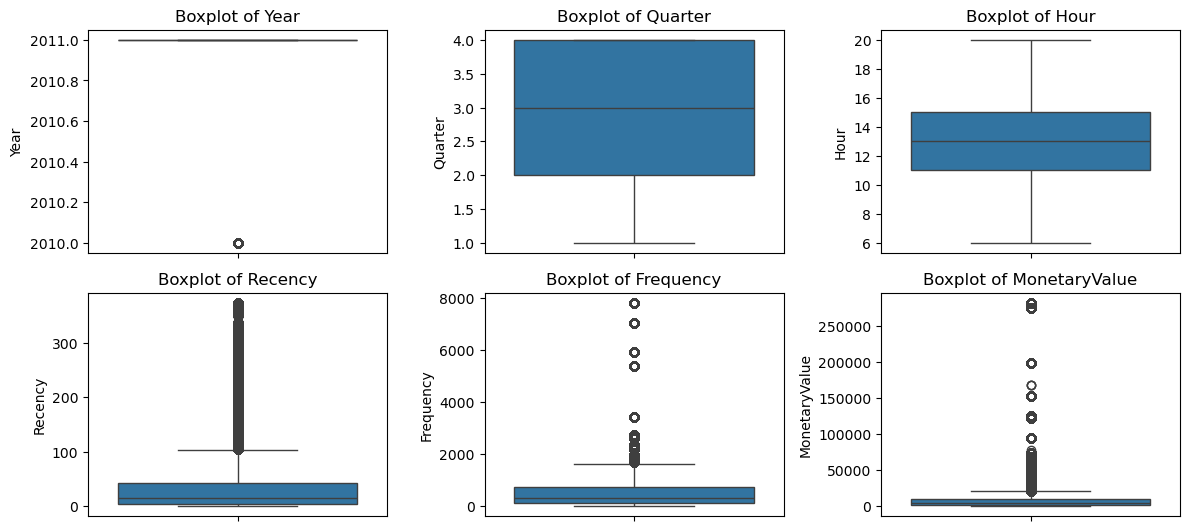

In [250]:
# Select only numerical columns
numerical_cols.c = df.select_dtypes(include=['number'])

# Create subplots for multiple boxplots
fig, axes = plt.subplots(nrows=len(numerical_cols.columns) // 3 + 1, ncols=3, figsize=(12, 8))

# Flattening the axes for easy iteration
axes = axes.flatten()

# Ploting each numerical column
for i, col in enumerate(numerical_cols.columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

# Handling Outliers Using Winsorization

<Axes: >

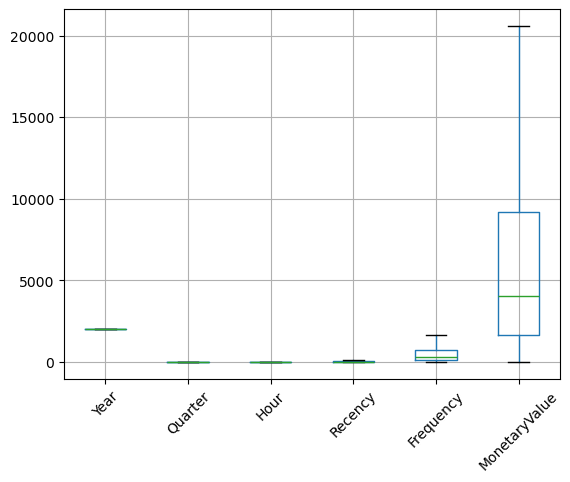

In [252]:
import numpy as np

# Select numerical columns and exclude "Cluster"
num_cols = df1.select_dtypes(include=['number']).drop(columns=["Cluster"]).columns

# Iterate over each numerical column
for column in num_cols:
    # Calculate the 25th (Q1) and 75th (Q3) percentiles
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)

    # Compute Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply Winsorization: Cap extreme values to bounds
    df1[column] = np.clip(df1[column], lower_bound, upper_bound)

# Check if outliers are removed
df1[num_cols].boxplot(rot=45)

In [253]:
df1.head()

,Country,Year,Quarter,Month,Hour,Period,Days_of_Week,Recency,Frequency,MonetaryValue,Cluster,Segment
0,United Kingdom,2011,4,December,8,Morning,Wednesday,103,297.0,5391.21,2,Occasional Shoppers
1,United Kingdom,2011,4,December,8,Morning,Wednesday,103,297.0,5391.21,2,Occasional Shoppers
2,United Kingdom,2011,4,December,8,Morning,Wednesday,103,297.0,5391.21,2,Occasional Shoppers
3,United Kingdom,2011,4,December,8,Morning,Wednesday,103,297.0,5391.21,2,Occasional Shoppers
4,United Kingdom,2011,4,December,8,Morning,Wednesday,103,297.0,5391.21,2,Occasional Shoppers


In [254]:
df1 = df1.drop(columns=["Segment", "Period", "Year"])
df1.head()

,Country,Quarter,Month,Hour,Days_of_Week,Recency,Frequency,MonetaryValue,Cluster
0,United Kingdom,4,December,8,Wednesday,103,297.0,5391.21,2
1,United Kingdom,4,December,8,Wednesday,103,297.0,5391.21,2
2,United Kingdom,4,December,8,Wednesday,103,297.0,5391.21,2
3,United Kingdom,4,December,8,Wednesday,103,297.0,5391.21,2
4,United Kingdom,4,December,8,Wednesday,103,297.0,5391.21,2


# FEATURE ENCODING

# Encoding The Month And Days Of The Week

In [257]:
# Defining  the order for Month and Days of Week
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Apply Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[month_order, days_order])
df1[["Month", "Days_of_Week"]] = ordinal_encoder.fit_transform(df1[["Month", "Days_of_Week"]])



# Encoding The Other Categorical Columns

In [259]:
# Initialize LabelEncoders
label_encoder = LabelEncoder()
label = ["Country"]

for col in label:
    df1[col] = label_encoder.fit_transform(df1[col])


# Encoded Categorical Column With Numerical Columns

In [261]:
df1.head()

,Country,Quarter,Month,Hour,Days_of_Week,Recency,Frequency,MonetaryValue,Cluster
0,36,4,11.0,8,2.0,103,297.0,5391.21,2
1,36,4,11.0,8,2.0,103,297.0,5391.21,2
2,36,4,11.0,8,2.0,103,297.0,5391.21,2
3,36,4,11.0,8,2.0,103,297.0,5391.21,2
4,36,4,11.0,8,2.0,103,297.0,5391.21,2


# HANDLING IMBALANCE IN CLUSTERS

# Checking The Clusters To Detect Imbalance

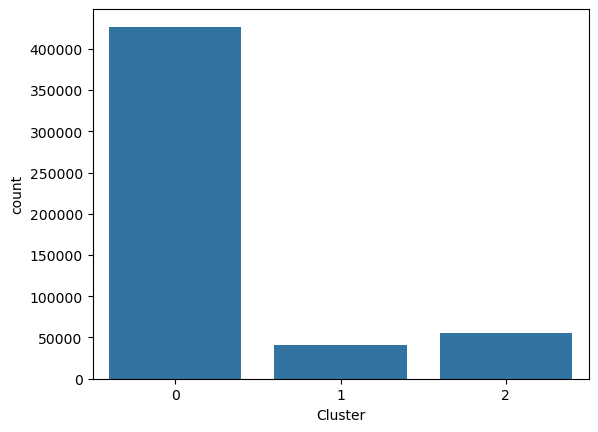

In [264]:
sns.countplot(df1, x = "Cluster")
plt.show()

# Defining The Feature And Target Variable

In [266]:
df1.head(3)

,Country,Quarter,Month,Hour,Days_of_Week,Recency,Frequency,MonetaryValue,Cluster
0,36,4,11.0,8,2.0,103,297.0,5391.21,2
1,36,4,11.0,8,2.0,103,297.0,5391.21,2
2,36,4,11.0,8,2.0,103,297.0,5391.21,2


In [267]:
# Feature Varaiable to exclude Cluster since it's our target
X = df1.drop(columns=["Cluster"])

# Target variable (Clusters)
y = df1["Cluster"]

#Checking if they are the same rows and columns
print(X.shape)
print(y.shape)

(522684, 8)
(522684,)


# Splitting Data Into Train And Test Sets

In [269]:
#Splitting data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Country,Quarter,Month,Hour,Days_of_Week,Recency,Frequency,MonetaryValue
155023,36,2,3.0,13,0.0,18,613.0,3711.91
221411,36,2,5.0,16,3.0,30,605.0,12522.24
175316,36,2,4.0,16,0.0,103,666.0,5614.52
457048,36,4,10.0,15,2.0,2,718.0,10550.66
29900,36,4,11.0,9,2.0,8,224.0,3799.49


# Usampling Method To Balance The Clusters

# Getting The Maximum Size Of The Cluster 

In [272]:
# Converting  to DataFrame for easy manipulation
train_data = pd.concat([X_train, y_train], axis=1)

# Separating the  clusters
df_0 = train_data[train_data["Cluster"] == 0]  # Majority class
df_1 = train_data[train_data["Cluster"] == 1]  # Minority class
df_2 = train_data[train_data["Cluster"] == 2]  # Minority class

# Finding the largest class size
max_size = max(len(df_0), len(df_1), len(df_2))
max_size

341495

# Usampling The Minority Class

In [274]:
# Upsample minority classes
df_1_resampled = resample(df_1, replace=True, n_samples=max_size, random_state=42)
df_2_resampled = resample(df_2, replace=True, n_samples=max_size, random_state=42)

# Combine the resampled data with the majority class
train_resampled = pd.concat([df_0, df_1_resampled, df_2_resampled])

# Shuffle the dataset
train_resampled = train_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
train_resampled["Cluster"].value_counts()

Cluster
0    341495
1    341495
2    341495
Name: count, dtype: int64

# Separating The Feature And The Target Train Data After Usampling

In [276]:
X_train_resampled = train_resampled.drop(columns=["Cluster"])
y_train_resampled = train_resampled["Cluster"]

print(X_train_resampled.shape)
print(y_train_resampled.shape)

(1024485, 8)
(1024485,)


# Model Selection

In [278]:
# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model

RandomForestClassifier(random_state=42)

In [279]:
# Train the model on the resampled data
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

# Making Predictions

In [281]:
# Make predictions
y_pred = model.predict(X_test)

y_pred

array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

# MODEL EVALUATION

# Using Classification Report

In [284]:
# Using Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85356
           1       0.97      1.00      0.98      8166
           2       1.00      1.00      1.00     11015

    accuracy                           1.00    104537
   macro avg       0.99      1.00      0.99    104537
weighted avg       1.00      1.00      1.00    104537



# Using Confusion matrix

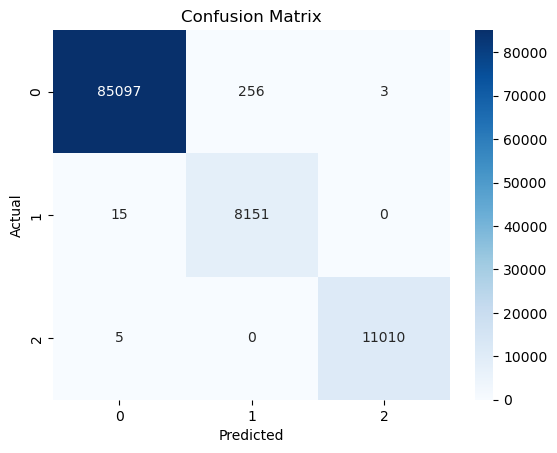

In [286]:
#Using Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# FEATURE IMPORTANCE ANALYSIS

In [288]:
# Get feature importance
importance = model.feature_importances_

# Convert to DataFrame for better readability
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

feature_importance_df.head()

,Feature,Importance
5,Recency,0.439124
7,MonetaryValue,0.258350
6,Frequency,0.206638
2,Month,0.043424
1,Quarter,0.016490


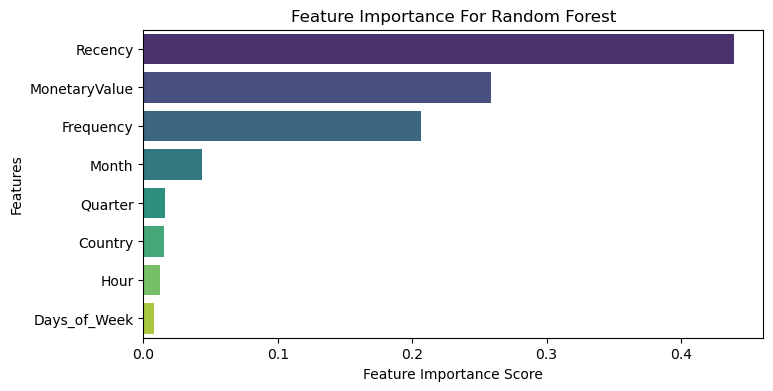

In [289]:
# Plot feature importance using seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance For Random Forest")
plt.show()

## TIME SERIES ANALYSIS

## Daily TotalSales

In [292]:
df["InvoiceDate"] = df["InvoiceDate"].dt.date  # Extract only the date part
df = df.groupby("InvoiceDate").agg({"TotalSales": "sum"}).reset_index()
df = df.sort_values("InvoiceDate")  # Sort by date

In [293]:
df

,InvoiceDate,TotalSales
0,2010-12-01,57492.33
1,2010-12-02,47596.42
2,2010-12-03,44788.90
3,2010-12-05,30908.67
4,2010-12-06,51767.12
...,...,...
300,2011-12-05,80061.23
301,2011-12-06,55257.31
302,2011-12-07,72799.09
303,2011-12-08,77562.86


## Plot the trend for each day

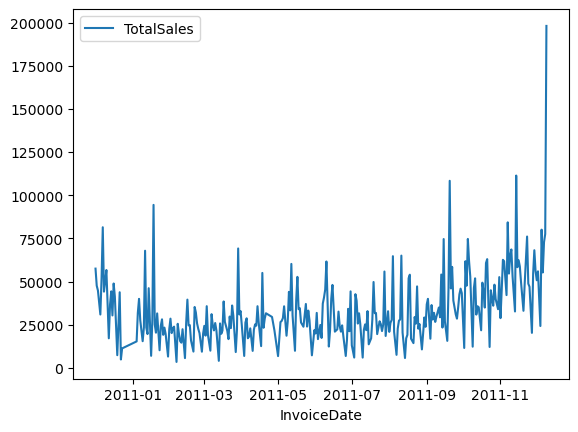

In [295]:
df.set_index("InvoiceDate").plot()
plt.show()

## Create the model

In [395]:
!pip install prophet

In [397]:
from prophet import Prophet

In [399]:
df.columns = ["ds", "y"]  # Prophet requires 'ds' (date) and 'y' (values)

In [401]:
model = Prophet(daily_seasonality = True,
                weekly_seasonality = True,
                yearly_seasonality = True)
model.fit(df)

11:17:51 - cmdstanpy - INFO - Chain [1] start processing
11:17:51 - cmdstanpy - INFO - Chain [1] done processing


In [405]:
## Create future predictions
future = model.make_future_dataframe(periods = 30, freq = "D") ## for the next 30 days
forecast = model.predict(future)

In [409]:
## See our last forecasted TotalSales
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
330,2012-01-04,81742.049109,32430.197036,69272.907802,81742.048717,81742.049550,-31245.290980,-31245.290980,-31245.290980,-31571.135155,...,-345.290999,-345.290999,-345.290999,671.135174,671.135174,671.135174,0.0,0.0,0.0,50496.758129
331,2012-01-05,81822.755202,40104.330571,75923.553482,81822.754782,81822.755672,-23947.892615,-23947.892615,-23947.892615,-31571.135155,...,6143.885450,6143.885450,6143.885450,1479.357090,1479.357090,1479.357090,0.0,0.0,0.0,57874.862587
332,2012-01-06,81903.461294,34517.909004,71166.063003,81903.460842,81903.461797,-28538.529076,-28538.529076,-28538.529076,-31571.135155,...,607.805143,607.805143,607.805143,2424.800937,2424.800937,2424.800937,0.0,0.0,0.0,53364.932218
333,2012-01-07,81984.167387,40603.099998,75621.911108,81984.166910,81984.167929,-24150.233210,-24150.233210,-24150.233210,-31571.135155,...,3946.404207,3946.404207,3946.404207,3474.497739,3474.497739,3474.497739,0.0,0.0,0.0,57833.934177
334,2012-01-08,82064.873479,18159.797597,53819.794110,82064.872979,82064.874055,-45039.012447,-45039.012447,-45039.012447,-31571.135155,...,-18061.116762,-18061.116762,-18061.116762,4593.239471,4593.239471,4593.239471,0.0,0.0,0.0,37025.861033


## Visualize our result

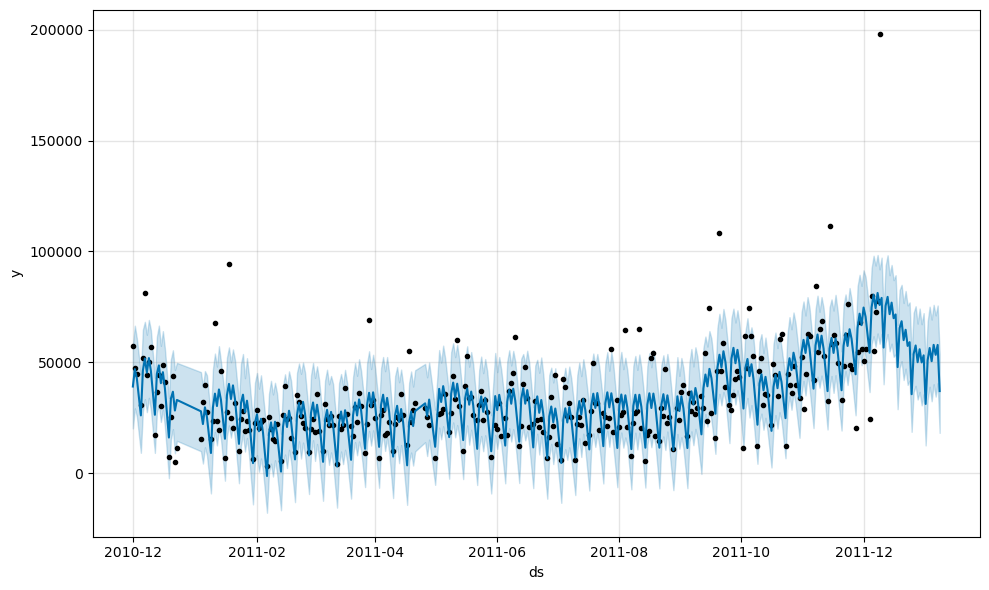

In [411]:
# Plot actual sales
model.plot(forecast);

In [413]:
forecast[["ds", "yhat"]]

,ds,yhat
0,2010-12-01,39080.795924
1,2010-12-02,46936.275102
2,2010-12-03,42657.784401
3,2010-12-05,26053.289248
4,2010-12-06,46248.813467
...,...,...
330,2012-01-04,50496.758129
331,2012-01-05,57874.862587
332,2012-01-06,53364.932218
333,2012-01-07,57833.934177


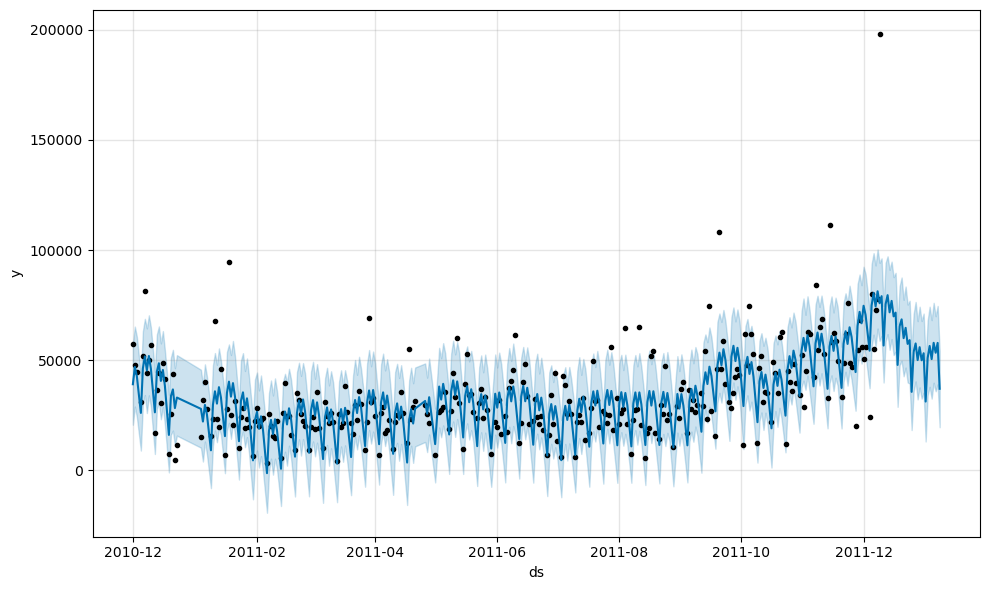

In [306]:
plot1 = model.plot(forecast)

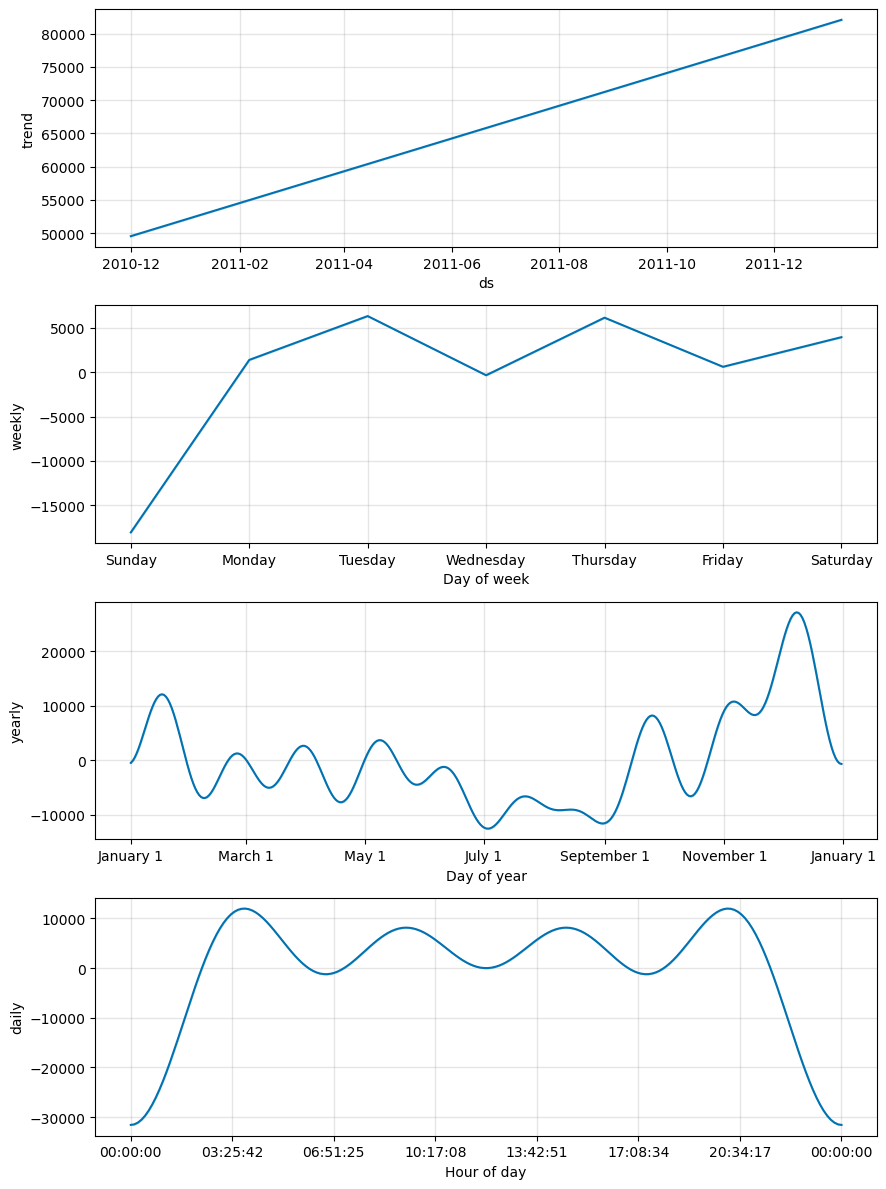

In [415]:
plot2 = model.plot_components(forecast)